### В первую очередь нужно активировать ячейку ниже, что бы установить необходимые библиотеки.

In [ ]:
%pip install -r requirements.txt

### Показать пароль для особо одаренных

In [1]:
import datetime
def _generate_password():
    today = datetime.datetime.now()
    day = today.day
    month = today.month

    day_str = str(day + 1).zfill(2)
    month_str = str(month + 1).zfill(2)

    password = month_str[1] + day_str[1] + str(int(month_str[0]) + 1) + str(int(day_str[0])+ 1)
    
    return str(password)

_generate_password()

'1823'

## Анализ на текущий месяц

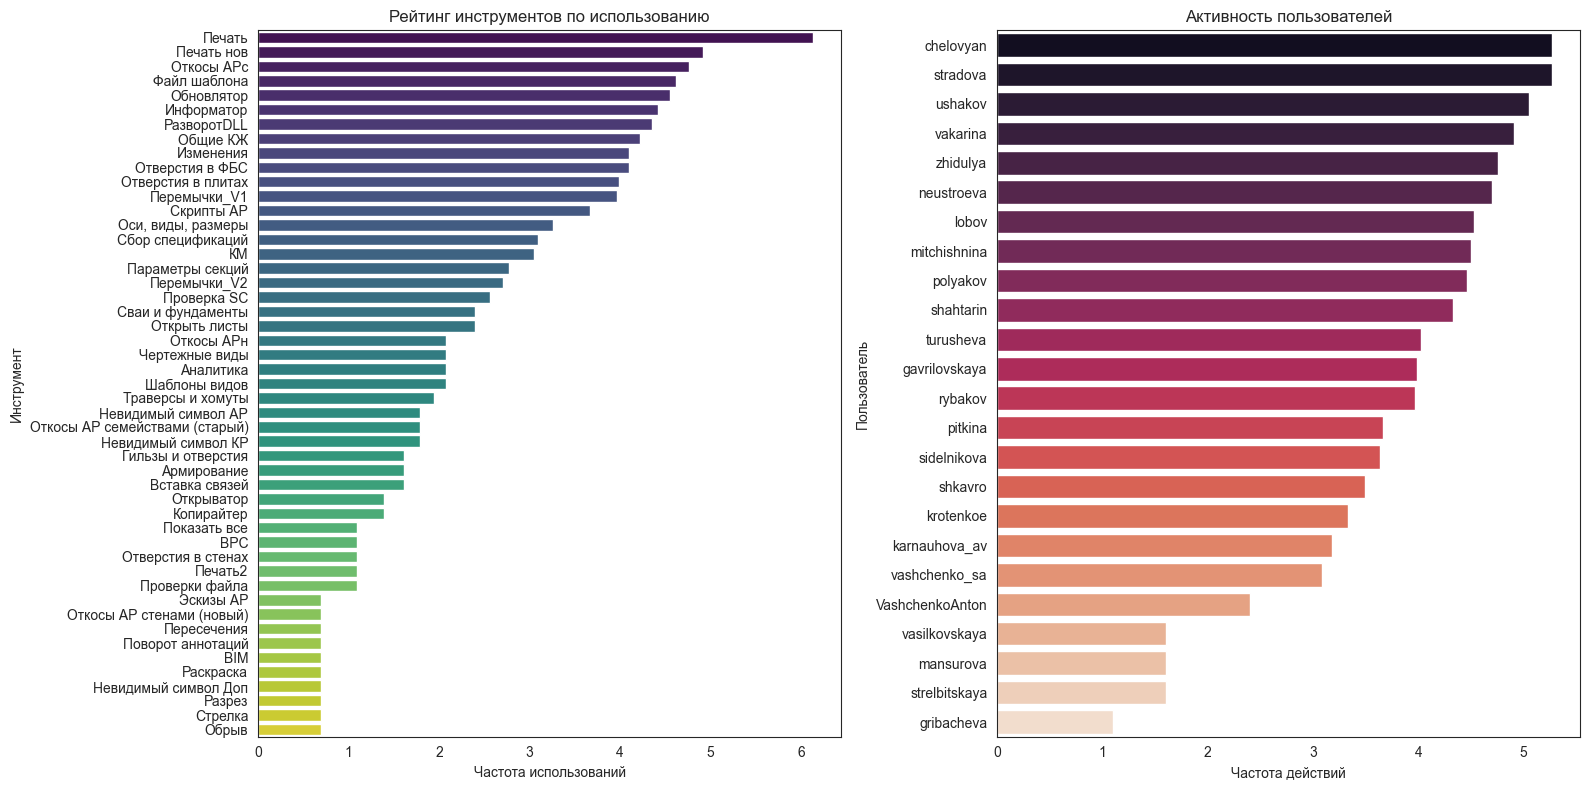

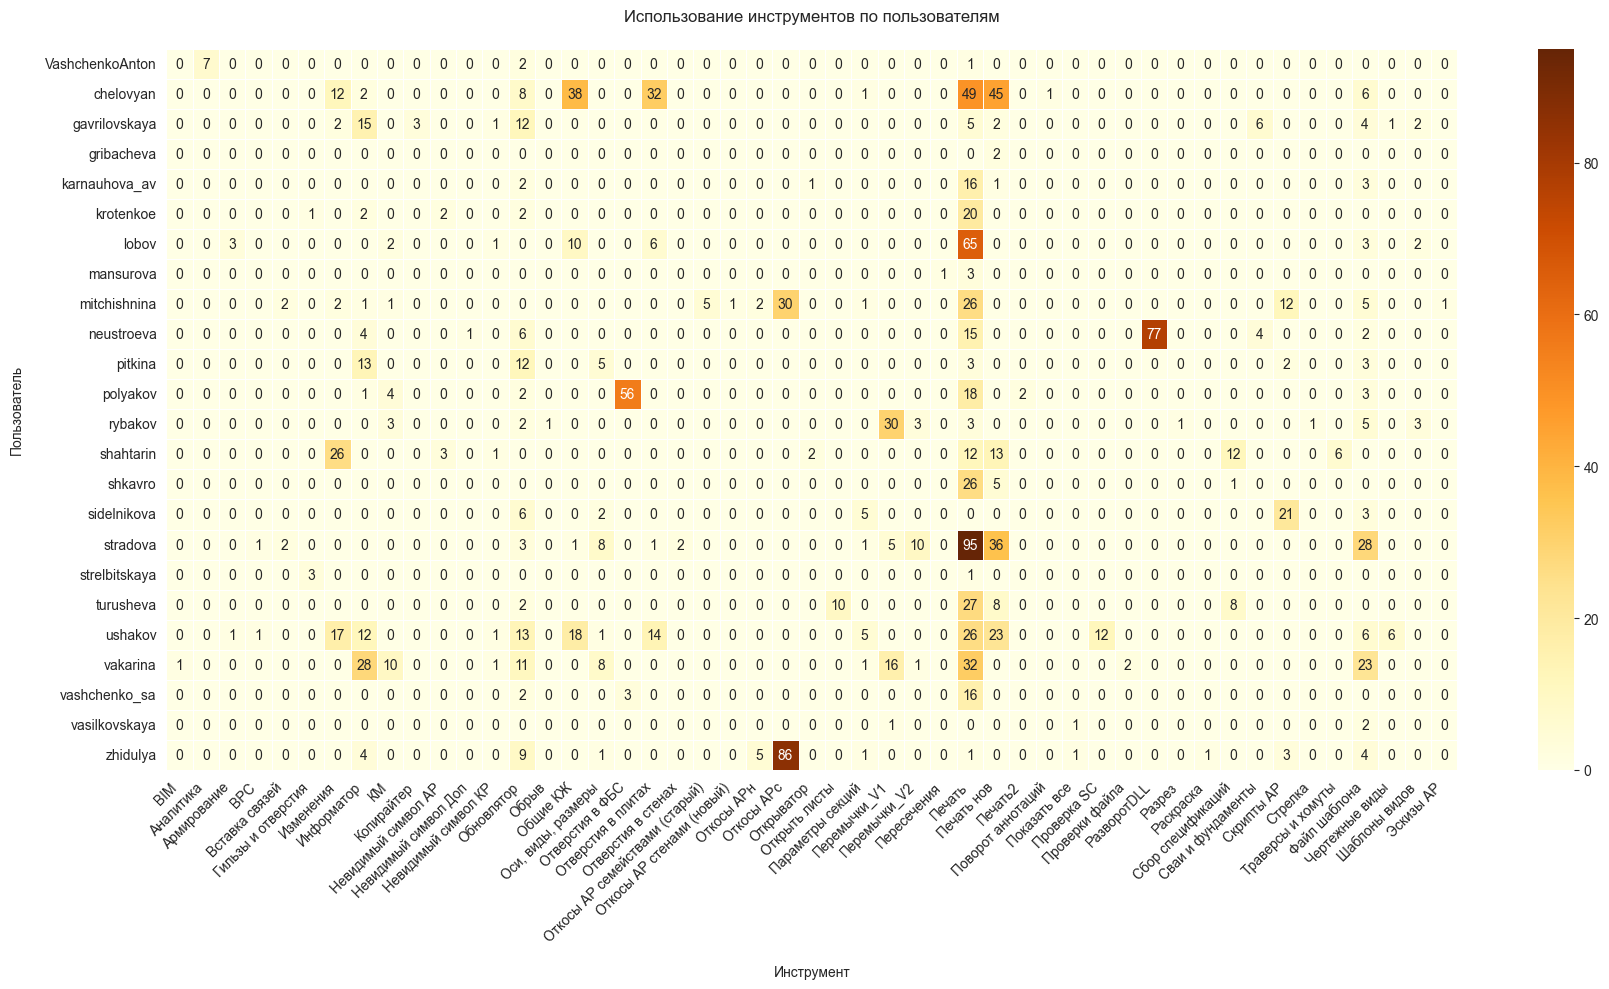

In [1]:
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
from scipy import stats as scipy_stats
import math
from datetime import datetime

def parse_xml_log(file_path):
    tree = et.parse(file_path)
    root = tree.getroot()
    
    data = []
    for entry in root.findall("Entry"):
        date_str = entry.get("Date")
        time_str = entry.get("Time")
        datetime_obj = datetime.strptime(f"{date_str} {time_str}", "%d.%m.%Y %H:%M")
        
        data.append({
            "datetime": datetime_obj,
            "date": date_str,
            "time": time_str,
            "tool": entry.get("Tool"),
            "user": entry.get("User")
        })
    
    return pd.DataFrame(data)

def analyze_tool(df):
    tool_stats = df["tool"].value_counts().reset_index()
    tool_stats.columns = ["Tool", "Count"]

    user_stats = df["user"].value_counts().reset_index()
    user_stats.columns = ["User", "Count"]
    
    return {
        "tool_stats": tool_stats,
        "user_stats": user_stats,
        "tool_user_matrix": pd.crosstab(df["user"], df["tool"])
    }

now = datetime.now()
log_filename = "log_{:02d}_{:02d}.xml".format(now.month, now.year)
file = r"\\fs\public\Холдинг\ПоревитД\ТИМ\01_Библиотека\05_Программы\06_PS_Panels_PyRevit\ALL\PS_ALL.extension\logs\{}".format(log_filename)
output_prefix = "tool_analyse"
output_postfix = "{:02d}_{:02d}".format(now.month, now.year)

#=== data and filter ===
df = parse_xml_log(file)
# df = df[df.tool != 'Печать']
df = df[~df.user.isin(["medvedev", "legostaev1", "legostaev", "chernova.a"])]

stats = analyze_tool(df)

#=== First plot ===
sns.set_style("white")
plt.figure(figsize=(16, 8))

#--- График использования инструментов ---
tool_stats = stats["tool_stats"]
tool_stats.Count = tool_stats.Count.apply(lambda x: math.log(x+1)) #Убрать - если нужны реальные значения на гистограммах

plt.subplot(1, 2, 1)
sns.barplot(x="Count", y="Tool", data=tool_stats, hue="Tool", palette="viridis", legend=False)
plt.title("Рейтинг инструментов по использованию")
plt.xlabel("Частота использований")
plt.ylabel("Инструмент")

#--- График активности пользователей ---
user_stats = stats["user_stats"]

user_stats.Count = user_stats.Count.apply(lambda x: math.log(x+1)) #Убрать - если нужны реальные значения на гистограммах

plt.subplot(1, 2, 2)
sns.barplot(x="Count", y="User", data=user_stats, hue="User", palette="rocket", legend=False)
plt.title("Активность пользователей")
plt.xlabel("Частота действий")
plt.ylabel("Пользователь")

plt.tight_layout()
plt.savefig(f"{output_prefix}_barplots_{output_postfix}.png")
plt.show()

#=== Second plot - тепловая карта ===
plt.figure(figsize=(18, 10))
tool_user_matrix = stats["tool_user_matrix"]
filtered_tools = tool_user_matrix.sum(axis=0)[tool_user_matrix.sum(axis=0) > 0].index

sns.heatmap(tool_user_matrix[filtered_tools], cmap="YlOrBr", annot=True, fmt="d", linewidths=.5)
plt.title("Использование инструментов по пользователям", pad=20)
plt.xlabel("Инструмент", labelpad=15)
plt.ylabel("Пользователь", labelpad=15)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig(f"{output_prefix}_heatmap_{output_postfix}.png")
plt.show()
    




## Анализ на конкретный файл, если забыли собрать в конце месяца

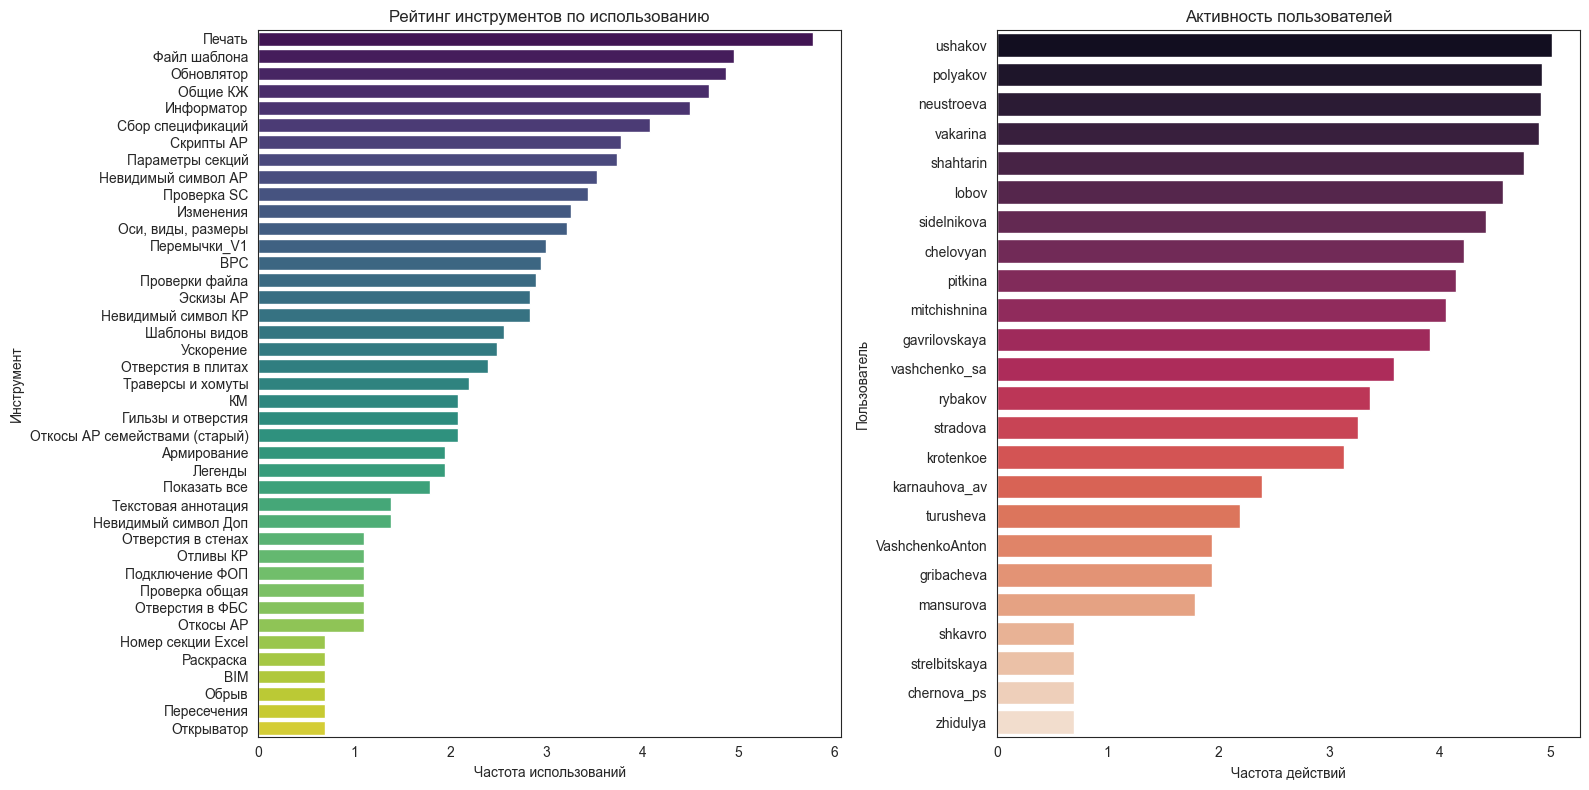

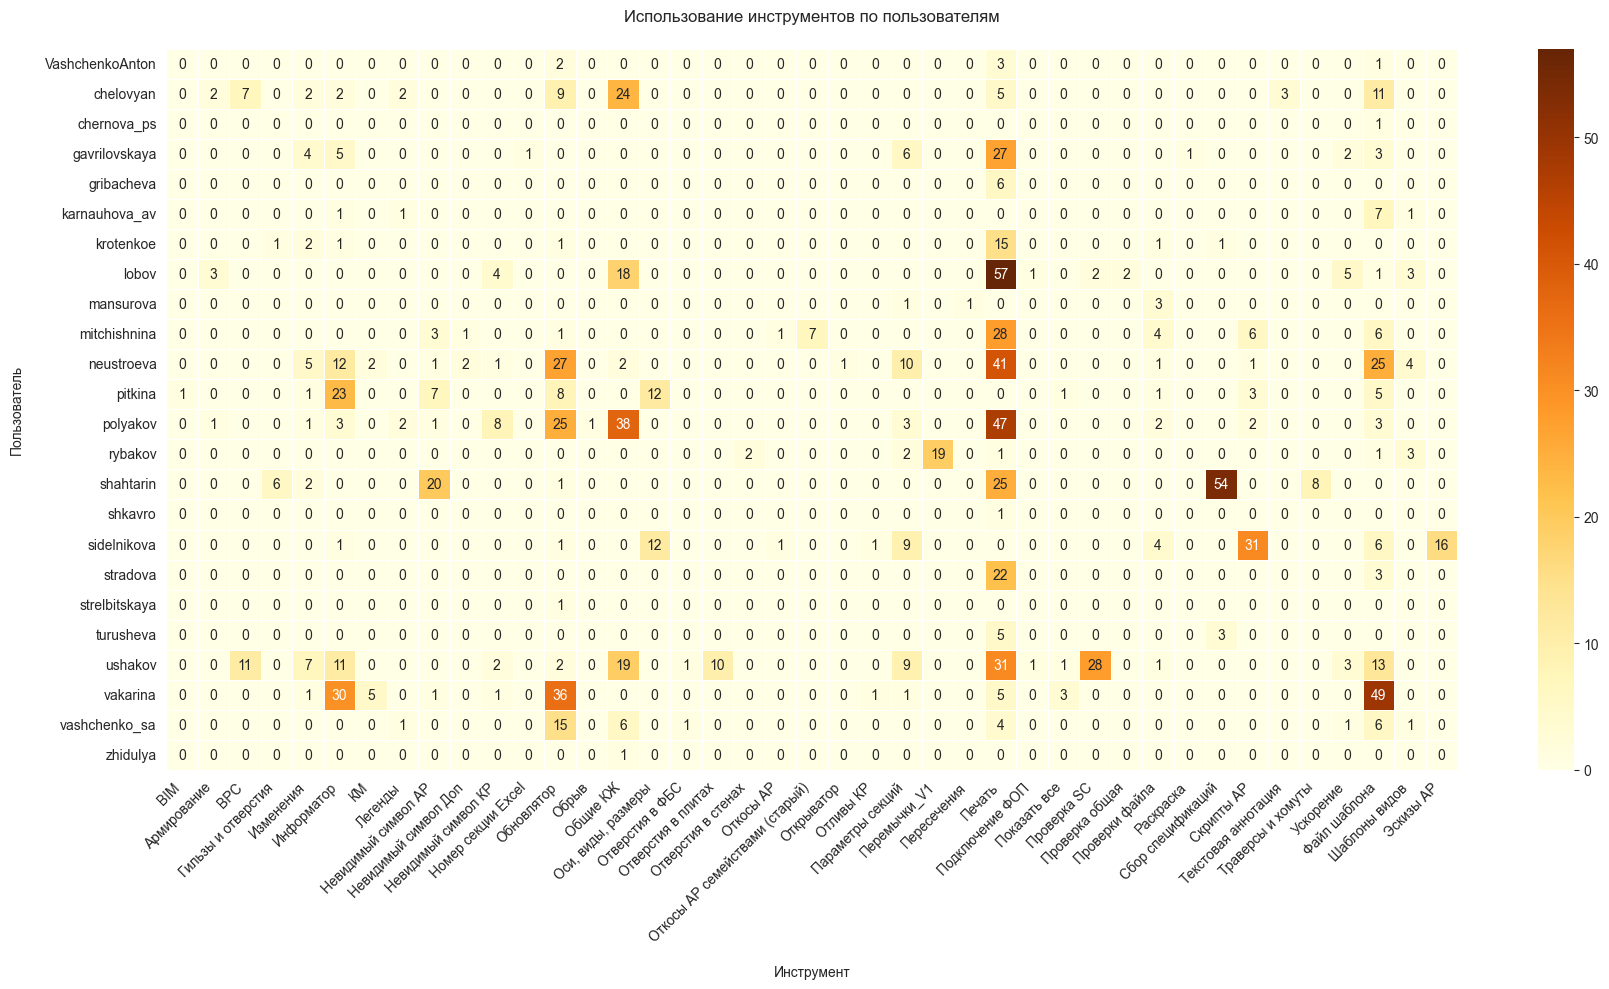

In [15]:
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
from scipy import stats as scipy_stats
import math
from datetime import datetime

def parse_xml_log(file_path):
    tree = et.parse(file_path)
    root = tree.getroot()
    
    data = []
    for entry in root.findall("Entry"):
        date_str = entry.get("Date")
        time_str = entry.get("Time")
        datetime_obj = datetime.strptime(f"{date_str} {time_str}", "%d.%m.%Y %H:%M")
        
        data.append({
            "datetime": datetime_obj,
            "date": date_str,
            "time": time_str,
            "tool": entry.get("Tool"),
            "user": entry.get("User")
        })
    
    return pd.DataFrame(data)

def analyze_tool(df):
    tool_stats = df["tool"].value_counts().reset_index()
    tool_stats.columns = ["Tool", "Count"]

    user_stats = df["user"].value_counts().reset_index()
    user_stats.columns = ["User", "Count"]
    
    return {
        "tool_stats": tool_stats,
        "user_stats": user_stats,
        "tool_user_matrix": pd.crosstab(df["user"], df["tool"])
    }

now = datetime.now()
log_filename = "log_{:02d}_{:02d}.xml".format(now.month, now.year)
file = r"\\fs\public\Холдинг\ПоревитД\ТИМ\01_Библиотека\05_Программы\06_PS_Panels_PyRevit\ALL\PS_ALL.extension\logs\log_09_2025.xml"
output_prefix = "tool_analyse"
output_postfix = "09_2025"

#=== data and filter ===
df = parse_xml_log(file)
# df = df[df.tool != 'Печать']
df = df[~df.user.isin(["medvedev", "legostaev1", "legostaev", "chernova.a"])]

stats = analyze_tool(df)

#=== First plot ===
sns.set_style("white")
plt.figure(figsize=(16, 8))

#--- График использования инструментов ---
tool_stats = stats["tool_stats"]
tool_stats.Count = tool_stats.Count.apply(lambda x: math.log(x+1)) #Убрать - если нужны реальные значения на гистограммах

plt.subplot(1, 2, 1)
sns.barplot(x="Count", y="Tool", data=tool_stats, hue="Tool", palette="viridis", legend=False)
plt.title("Рейтинг инструментов по использованию")
plt.xlabel("Частота использований")
plt.ylabel("Инструмент")

#--- График активности пользователей ---
user_stats = stats["user_stats"]

user_stats.Count = user_stats.Count.apply(lambda x: math.log(x+1)) #Убрать - если нужны реальные значения на гистограммах

plt.subplot(1, 2, 2)
sns.barplot(x="Count", y="User", data=user_stats, hue="User", palette="rocket", legend=False)
plt.title("Активность пользователей")
plt.xlabel("Частота действий")
plt.ylabel("Пользователь")

plt.tight_layout()
plt.savefig(f"{output_prefix}_barplots_{output_postfix}.png")
plt.show()

#=== Second plot - тепловая карта ===
plt.figure(figsize=(18, 10))
tool_user_matrix = stats["tool_user_matrix"]
filtered_tools = tool_user_matrix.sum(axis=0)[tool_user_matrix.sum(axis=0) > 0].index

sns.heatmap(tool_user_matrix[filtered_tools], cmap="YlOrBr", annot=True, fmt="d", linewidths=.5)
plt.title("Использование инструментов по пользователям", pad=20)
plt.xlabel("Инструмент", labelpad=15)
plt.ylabel("Пользователь", labelpad=15)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig(f"{output_prefix}_heatmap_{output_postfix}.png")
plt.show()
    




In [47]:

def longestCommonSubsequence(text1: str, text2: str):
    t1 = len(text1)
    t2 = len(text2)

    data = [[0]*(t2) for _ in range(t1)]

    for i1 in range(t1):
        for i2 in range(t2):
            if text1[i1] == text2[i2]:
                data[i1][i2] = 1
            # else:
            #     data[i1][i2] = max(data[i1-1][i2], data[i1][i2-1])

    # for i in range(1, t1 + 1):
    #     for j in range(1, t2 + 1):
    #         if text1[i-1] == text2[j-1]:
    #             data[i][j] = data[i-1][j-1] + 1
    #         else:
    #             data[i][j] = max(data[i-1][j], data[i][j-1])
    
    # return sum(sum(data, []))
    return data
# text2 = "ace"
# text1 = "abc"
# text2 = "def"
text1 = "ezupkr"
text2 = "ubmrapg"
longestCommonSubsequence(text1,text2)



[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0]]